## CH6 有返回值的函数

许多我们前面使用过的 Python 函数都会产生返回值，如数学函数。但目前我们所写的函数都是空函数 (void): 它们产生某种效果，像打印一个值或是移动乌龟，但是并没有返回值。在本章中，你将学习如何写一个有返回值的函数。

## 6.1 返回值

调用一个有返回值的函数会生成一个返回值，我们通常将其赋值给某个变量或是作为表达式的一部分。

In [6]:
import math
radius = 1
radians = 60
e = math.exp(1.0)
height = radius * math.sin(radians)

目前我们所写的函数都是空函数。泛泛地来看，它们没有返回值；更准确地说，它们的返回值是 `None` 。

本章中，我们（终于）要开始写有返回值的函数了。第一个例子是 `area` ，返回给定半径圆的面积。

In [7]:
def area(radius):
    a = math.pi * radius ** 2
    return a

我们之前已经见过 `return` 语句，但在有返回值的函数中，`return` 语句包含一个表达式。条语句的意思是：“马上从该函数返回，并使用接下来的表达式作为返回值。” 此表达式可以是任意复杂的因此我们可以将该函数写得更简洁些：

In [8]:
def area(radius):
    return math.pi * radius **2

另一方面，像 `a` 这样的*临时变量* (temporary variables) 能使调试变得更简单。

有时，在条件语句的每一个分支内各有一个返回语句会很有用：

In [9]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

因为这些 `return` 语句在不同的条件内，最后只有**一个**会被执行。

一旦一条返回语句执行，函数则终止，不再执行后续的语句。出现在某条 `return` 语之后的代码，或者在执行流程永远不会到达之处的代码，被称为*死代码* (dead code)。

在一个有返回值的函数中，最好保证程序执行的每一个流程最终都会碰到一个 `return` 语
句。例如：

In [10]:
def absolute_value(x):
    if x < 0:
        return -x
    if x > 0:
        return x

这个函数是有问题的。原因是如果` x` 恰好是 0，则没有条件为真，函数将会在未执行任何 `return` 语句的情况下终止。如果函数按照这种执行流程执行完毕，返回值将是 `None` ，这可不是 0 的绝对值。

In [15]:
absolute_value(0)

In [16]:
print(absolute_value(0))

None


顺便说一下，Python 提供了一个的内建函数 `abs` 用来计算绝对值。

我们来做个练习，写一个比较函数 `compare` ，接受两个值 `x` 和 `y` 。如果 `x` > `y`，则返回 `1` ；如果 `x == y`，则返回 `0` ；如果 `x` < `y`，则返回 `−1`。

In [17]:
def compare(x, y):
    if x > y:
        return 1
    elif x == y:
        return 0
    elif x < y:
        return -1

## 6.2 增量式开发

随着你写的函数越来越大，你在调试上花的时候可能会越来越多。

为了应对越来越复杂的程序，你可以开始尝试叫作*增量式开发* (incremental development) 的方法。增量式开发的目标，是通过每次只增加和测试少量代码，来避免长时间的调试。

举个例子，假设你想计算两个给定坐标点 $(x1, y1)$ 和 $(x2, y2)$ 之间的距离。根据毕达哥拉斯定理，二者的距离是：

$$distance = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

第一步要考虑的是在 Python 中，距离函数看起来会是什么样。换句话说，输入（形参）和输出（返回值）是什么？

本例中，输入是可以用 4 个数表示的两个点。返回值是距离，用浮点数表示。

现在你就可以写出此函数的轮廓了：

In [18]:
def distance(x1, y1, x2, y2):
    return 0.0

显然，此版本不能计算距离；它总是返回 `0` 。但是在语法上它是正确的，并且能运行，这意味着你可以在使它变得更复杂之前测试它。

用样例实参调用它来进行测试。

In [19]:
distance(1, 2, 4, 6)

0.0

我选择的这些值，可以使水平距离为 3 ，垂直距离为 4 ；这样结果自然是 5，构成了一个勾三股四弦五的直角三角形。测试一个函数时，知道正确的答案是很有用的。

此时我们已经确认这个函数在语法上是正确的，我们可以开始往函数体中增加代码。下一步合理的操作，应该是求 $x2 − x1$ 和 $y2 − y1$ 这两个差值。下一个版本在临时变量中存储这些值并打印出来。

In [22]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('dx is', dx)
    print('dy is', dy)
    return 0.0

如果这个函数正常运行，它应该显示 `dx is 3` 以及 `dy is 4` 。这样的话我们就知道函数获得了正确的实参并且正确执行了第一步计算。如果不是，也只要检查几行代码。

下一步我们计算 `dx` 和 `dy` 的平方和。

In [23]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('dsquared is:', dsquared)
    return 0.0

再一次运行程序并检查结果 (应该是 25 )。最后，你可以使用 math.sqrt 计算并返回结果。

In [26]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

如果其正确运行的话，你就成功了。否则你可能想在 `return` 语句前打印结果检查一下。

该函数的最终版不会在运行时显示任何东西，仅仅返回一个值。我们之前写的 `print` 语
句在调试时是很有用的，不过在函数能够正确运行之后，你就该删了它们。我们称这样的代码为*脚手架代码* (scaffolding) ，因为它对程序的构建很有用，但不是最终产品的一部分。

当你刚开始的时候，最好每次只加入一两行代码。随着经验见长，你会发现自己可以编写、调试更大的代码块了。无论哪种方式，增量式开发都能节省你大量的调试时间。

这种开发方式的关键是：

1. 从一个能运行的程序开始，并且每次只增加少量改动。无论你何时遇到错误，都能够清楚定位错误的源头。

2. 用临时变量存储中间值，这样你就能显示并检查它们。

3. 一旦程序正确运行，你要删除一些脚手架代码，或者将多条语句组成复合表达式，但是前提是不会影响程序的可读性。

我们来做个练习：运用增量开发方式，写一个叫作 `hypotenuse` 的函数，接受直角三角形的两直角边长作为实参，返回该三角形斜边的长度。记录下你开发过程中的每一步。

In [34]:
def hypotenuse(a, b):
    return 0.0

def hypotenuse(a, b):
    print(a)
    print(b)
    return 0.0

def hypotenuse(a, b):
    print(a**2)
    print(b**2)
    return 0.0

def hypotenuse(a, b):
    c = a**2 + b**2
    print(c)
    return 0.0

def hypotenuse(a, b):
    c = a**2 + b**2
    return c

## 6.3 组合 

你现在应该已经猜到了，你可以从一个函数内部调用另一个函数。作为示例，我们接下来写一个函数，接受两个点为参数，分别是圆心和圆周上一点，然后计算圆的面积。

假设圆心坐标存储在变量 `xc` 和 `yc` 中，圆周上的点的坐标存储在 `xp` 和 `yp` 中。第一步是计算圆半径，也就是这两个点的距离。我们刚写的 `distance` 函数就可以计算距离：

In [37]:
xc, yc = 0, 0
xp, yp = 1, 1
radius = distance(xc, yc, xp, yp)

下一步是用得到的半径计算圆面积；我们也刚写了这样的函数：

In [40]:
result = area(radius)

将这些步骤封装在一个函数中，可以得到下面的函数：

In [42]:
def circle_area(xc, yc, xp, yp):
    radius = distance(xc, yc, xp, yp)
    result = area(radius)
    return result

临时变量 `radius` 和 `result` 对于开发调试很有用的，但是一旦函数正确运行了，我们可以通过合并函数调用，将程序变得更简洁：

In [43]:
def circle_area(xc, yc, xp, yp):
    return area(distance(xc, yc, xp, yp))

## 6.4 布尔函数

函数可以返回*布尔值* (booleans) ，通常对于隐藏函数内部的复杂测试代码非常方便。例如：

In [46]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False    

通常布尔函数名听起来像是一个疑问句，回答不是 Yes 就是 No，`is_divisible` 通过返回`True` 或 `False` 来表示 `x` 是否可以被 `y` 整除。

请看下面的示例：

In [48]:
is_divisible(6, 4)

False

In [49]:
is_divisible(6, 3)

True

`==` 运算符的结果是布尔值，因此我们直接返回它，让代码变得更简洁。

In [52]:
def is_divisible(x, y):
    return x % y == 0

布尔函数通常被用于条件语句：

In [59]:
x = y = 1
if is_divisible(x, y):
    print('x is divisible by y')

x is divisible by y


很容易写出下面这样的代码：

In [62]:
if is_divisible(x, y) == True:
    print('x is divisible by y')

x is divisible by y


但这里的比较是多余的。

我们来做个练习：写一个函数 `is_between(x, y, z)` ，如果 $x ≤ y ≤ z$ 返回 `True` 否则返回`False`。

In [64]:
def is_between(x, y, z):
    return x <= y <= z

## 6.5 再谈递归

我们目前只介绍了 Python 中一个很小的子集，但是当你知道这个子集已经是一个*完备的* 编程语言，你可能会觉得很有意思。这意味任何能被计算的东西都能用这个语言表达。有史以来所有的程序，你都可以仅用目前学过的语言特性重写 (事实上，你可能还需要一些命令来控制鼠标、磁盘等设备，但仅此而已)。

阿兰·图灵 (Alan Turing) 首次证明了这种说法的正确性，这是一项非凡的工作。他是首批计算机科学家之一2 相应地，这被称为图灵理论。关于图灵理论更完整（和更准确）的讨论，我推荐 Michael Sipser 的书《Introduction to the Theory of Computation》。

为了让你明白能用目前学过的工具做什么，我们将计算一些递归定义的数学函数。递归定义类似循环定义，因为定义中包含一个对已经被定义的事物的引用。一个纯粹的循环定义并没有什么用：

**漩涡状：** 一个用以描述漩涡状物体的形容词。

如果你看到字典里是这样定义的，你大概会生气。另一方面，如果你查找用 ! 符号表示的阶乘函数的定义，你可能看到类似下面的内容：

$$0!=1$$
$$n!=n(n-1)!$$

该定义指出 0 的阶乘是 1 ，任何其他值 $n$ 的阶乘是 $n$ 乘以 $n − 1$ 的阶乘。

所以 3! 的阶乘是 3 乘以 2! ，它又是 2 乘以 1! ，后者又是 1 乘以 0! 。放到一起，3! 等于 3 乘以 2 乘以 1 乘以 1 ，结果是 6 。

如果你可以递归定义某个东西，你就可以写一个 Python 程序计算它。第一步是决定应该有哪些形参。在此例中 `factorial` 函数很明显接受一个整形数：

In [66]:
def factorial(n):
    pass

如果实参刚好是 0 ，我们就返回 1：

In [68]:
def factorial(n):
    if n == 0:
        return 1

否则，就到了有意思的部分，我们要进行递归调用来找到 $n − 1$ 的阶乘然后乘以 $n$：

In [70]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        return result

程序的执行流程和第 5.8节中的 `countdown` 类似。如果我们传入参数的值是 3 ：

由于 3 不等于 0，我们执行第二个分支并计算 n-1 的阶乘...

由于 2 不等于 0，我们执行第二个分支并计算 n-1 的阶乘...

由于 1 不等于 0，我们执行第二个分支并计算 n-1 的阶乘...

由于 0 等于 0，我们执行第一个分支并返回 1，不再进行任何递归调用。

返回值 1 与 n （其为 1）相乘，并返回结果。

返回值 1 与 n （其为 2）相乘，并返回结果。

返回值 2 与 n （其为 3）相乘，而结果 6 也就成为一开始那个函数调用的返回值。

图 6.1 显示了该函数调用序列的堆栈图看上去是什么样子。

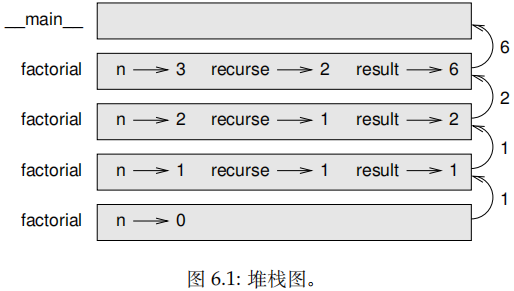

图中的返回值被描绘为不断被传回到栈顶。在每个栈帧中，返回值就是结果值，即是 `n`和 `recurse` 的乘积。

最后一帧中，局部变量 `recurse` 和 `result` 并不存在，因为生成它们的分支并没有执行。

## 6.6 信仰之跃

跟随程序执行流程是阅读程序代码的一种方法，但它可能很快会变得错综复杂。有另外一种替代方法，我称之为 ‘‘信仰之跃’’。当你遇到一个函数调用时，不再去跟踪执行流程，而是**假设** 这个函数正确运行并返回了正确的结果。

事实上，当你使用内建函数时，你已经在实践这种方法了。当你调用 `math.cos` 或 `math.exp`时，你并没有检查那些函数的函数体。你只是假设了它们能用，因为编写这些内建函数的人都是优秀的程序员。

当你调用一个自己写的函数时也是一样。例如，在 6.4 节中，我们写了一个 `is_divisible`函数来判断一个数能否被另一个数整除。通过对代码的检查，一旦我们确信这个函数能够正确运行 — 我们就能不用再查看函数体而直接使用了。

递归程序也是这样。当你遇到递归调用时，不用顺着执行流程，你应该假设每次递归调用能够正确工作 (返回正确的结果)，然后问你自己，‘‘假设我可以找到 $n − 1$ 的阶乘，我可以找到 $n$ 的阶乘吗？” 很明显你能，只要再乘以 $n$ 即可。

当然，在你没写完函数的时就假设函数正确工作有一点儿奇怪，但这也是为什么这被称作信仰之跃了！

## 6.7 再举一例

除了阶乘以外，使用递归定义的最常见数学函数是`fibonacci` (斐波那契数列)，见其定义：
$$fibonacci(0)=0$$
$$fibonacci(1)=1$$
$$fibonacci(n)=fibonacci(n-1)+fibonacci(n-2)$$

翻译成 Python ，看起来就像这样：

In [72]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

这里，如果你试图跟踪执行流程，即使是相当小的 $n$ ，也足够你头疼的。但遵循信仰之跃这种方法，如果你假设这两个递归调用都能正确运行，很明显将他们两个相加就是正确结果。

## 6.8 检查类型

6.8 检查类型如果我们将 1.5 作为参数调用阶乘函数 ( factorial ) 会怎样？

In [76]:
factorial(1.5)

RecursionError: maximum recursion depth exceeded in comparison

看上去像是一个无限循环。但那是如何发生的？函数的基础情形是 `n == 0` 。但是如果 `n`不是一个整型数呢，我们会错过 基础情形，永远递归下去。

在第一次递归调用中，`n` 的值是 0.5 。下一次，是 −0.5 。自此它会越来越小，但永远不会是 0 。

我们有两个选择。我们可以试着泛化 `factorial` 函数，使其能处理浮点数，或者我们可让 `factorial` 检查实参的类型。第一个选择被称作 `gamma` 函数，它有点儿超过本书的范围了。所以我们将采用第二种方法。

我们可以使用内建函数 `isinstance` 来验证实参的类型。同时，我们也可以确保该实参是正数：

In [79]:
def factorial(n):
    if not isinstance(n, int):
        print('Factorial is only defined for integers.')
        return None
    elif n < 0:
        print('Factorial is not defined for negative integers.')
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial(n-1)

第一个基础情形处理非整型数；第二个处理负整型数。在这两个情形中，程序打印一条错误信息，并返回 `None` 以指明出现了错误：

In [80]:
factorial('fred')

Factorial is only defined for integers.


In [81]:
factorial(-2)

Factorial is not defined for negative integers.


如果我们通过了这两个检查，那么我们知道 `n` 是一个正数或 0 ，因此我们可以证明递归会终止。

此程序演示了一个有时被称作*监护人* (guardian) 的模式。前两个条件扮演监护人的角色，避免接下来的代码使用引发错误的值。监护人使得验证代码的正确性成为可能。

在反向查找 (Reverse Lookup) 一节中，我们将看到更灵活地打印错误信息的方式：抛出异常。

## 6.9 调试

将一个大程序分解为较小的函数为调试生成了自然的检查点。如果一个函数不如预期的运行，有三个可能性需要考虑：
- 该函数获得的实参有些问题，违反先决条件。
- 该函数有些问题，违反后置条件。
- 返回值或者它的使用方法有问题。

为了排除第一种可能，你可以在函数的开始增加一条 `print` 语句来打印形参的值（也可以是它们的类型）。或者你可以写代码来显示地检查先决条件。

如果形参看起来没问题，就在每个 `return` 语句之前增加一条 `print` 语句，来打印返回值。如果可能，手工检查结果。考虑用一些容易检查的值来调用该函数（类似在 小节 中那样）。

如果该函数看起来正常工作，则检查函数调用，确保返回值被正确的使用（或者的确被使用了！）。

在一个函数的开始和结尾处增加打印语句，可以使执行流程更明显。例如，下面是一个带打印语句的阶乘函数：

In [83]:
def factorial(n):
    space = ' ' * (4 * n)
    print(space, 'factorial', n)
    if n == 0:
        print(space, 'returning 1')
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        print(space, 'returning', result)
        return result

space 是一个空格字符的字符串，用来控制输出的缩进。下面是 `factorial(4)` 的输出结果：

In [85]:
factorial(4)

                 factorial 4
             factorial 3
         factorial 2
     factorial 1
 factorial 0
 returning 1
     returning 1
         returning 2
             returning 6
                 returning 24


24

如果你对执行流程感到困惑，这种输出可能有助于理解。开发有效的脚手架代码会花些时间，但是一点点的脚手架代码能够节省很多的调试时间。

## 6.10 术语表

**临时变量 (temporary variable)：** 一个在复杂计算中用于存储过度值的变量。

**死代码 (dead code)：** 程序中永远无法执行的那部分代码，通常是因为其出现在一个返回语句之后。

**增量式开发 (incremental development)：** 一种程序开发计划，目的是通过一次增加及测试少量代码的方式，来避免长时间的调试。

**脚手架代码 (scaffolding)：** 程序开发中使用的代码，但并不是最终版本的一部分。

**监护人 (guardian)：** 一种编程模式，使用条件语句来检查并处理可能引发错误的情形。

## 6.11 练习

**Exercise 6.1.** 画出下面程序的堆栈图。这个程序的最终输出是什么？

In [91]:
def b(z):
    prod = a(z, z)
    print(z, prod)
    return prod

def a(x, y):
    x = x + 1
    return x * y

def c(x, y, z):
    total = x + y + z
    square = b(total) ** 2
    return square

x = 1
y = x + 1
print(c(x, y+3, x+y))

9 90
8100


**Exercise 6.2.** Ackermann 函数 $A(m, n)$ 的定义如下：

$$A(m,n)=\begin{cases}
n+1        &   if\ m=0\\
A(m-1,1)     &   if\ m>0\ and\ n=0\\
A(m-1,A(m,n-1))&   if\ m>0\ and\ n>0.\\
\end{cases}$$

查看 维基百科的定义，编写一个叫作`ack` 的函数来计算 Ackermann 函数。使用你的数计算`ack(3，4)`，其结果应该为 125 。如果`m` 和`n` 的值较大时，会发生什么？

In [94]:
def ack(m, n):
    if m == 0:
        return n+1
    elif m > 0 and n == 0:
        return ack(m-1, 1)
    elif m > 0 and n > 0:
        return ack(m-1, ack(m, n-1))

ack(3, 4)

125

In [95]:
ack(10, 10)

RecursionError: maximum recursion depth exceeded in comparison

**Exercise 6.3.** 回文词 (palindrome) 指的是正着拼反着拼都一样的单词，如 “noon” 和“redivider”。按照递归定义的话，如果某个词的首字母和尾字母相同，而且中间部分也是一个回文词，那它就是一个回文词。

下面的函数接受一个字符串实参，并返回第一个、最后一个和中间的字母：

In [96]:
def first(word):
    return word[0]

def last(word):
    return word[-1]

def middle(word):
    return word[1:-1]

1. 将它们录入到文件`palindrome.py` 中并测试。当你用一个两个字母的字符串调用middle 时会发生什么？一个字母的呢？空字符串呢？空字符串这样`"''"` 表示，中间不含任何字母。

2. 编写一个叫`is_palindrome` 的函数，接受一个字符串作为实参。如果是回文词，就返回`True` ，反之则返回`False` 。记住，你可以使用内建函数`len` 来检查字符串的长度。

In [108]:
%%writefile script.py
def first(word):
    return word[0]

def last(word):
    return word[-1]

def middle(word):
    return word[1:-1]

def is_palindrome(word):
    if len(word) <= 1:
        return True
    if first(word) != last(word):
        return False
    return is_palindrome(middle(word))

print(middle('aa'))
print(middle('a'))
print(middle(''))
print(is_palindrome('allen'))
print(is_palindrome('bob'))

Overwriting script.py


In [109]:
!python script.py




False
True


**Exercise 6.4.** 当数字 $a$ 能被 $b$ 整除，并且 $a/b$ 是 $b$ 的幂时，它就是 $b$ 的幂。编写一个叫`is_power` 的函数，接受两个参数`a` 和`b`，并且当`a` 是`b` 的幂时返回`True`。注意：你必须要想好基础情形。

**Exercise 6.5.** $a$ 和 $b$ 的最大公约数 (reatest common divisor, GCD) 是能被二者整除的最大数。

求两个数的最大公约数的一种方法，是基于这样一个原理：如果 $r$ 是 $a$ 被 $b$ 除后的余数，那么 $gcd(a, b) = gcd(b,r)$ 。我们可以把 $gcd(a, 0) = a$ 当做基础情形。

编写一个叫`gcd` 的函数，接受两个参数`a` 和`b`，并返回二者的最大公约数。

致谢：这道习题基于 Abelson 和 Sussman 编写的《Structure and Interpretation of Computer Programs》中的例子。

In [ ]:
def gcd(a, b):
    if b == 0:
        return a